In [6]:
# Install Tensorflow
!pip install tensorflow

In [7]:
# An Example of simple ANN
#importing the lib that we'll need today for deep learning

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
# Display information about the NVIDIA GPU in the environment
!nvidia-smi

Wed Oct 29 11:34:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [21]:
#Load dataset
df = pd.read_csv("bank.csv")

In [11]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [12]:
# Drop the 'duration' column from the DataFrame
# axis=1 specifies that we are dropping a column
# inplace=True modifies the DataFrame directly without needing to reassign it
df.drop('duration',axis=1,inplace=True)

In [13]:
#data looks balanced
df['deposit'].value_counts()

,count
deposit,
no,5873
yes,5289


In [14]:
#Encoded the target variables!
df['deposit']=df['deposit'].map({'yes':1,'no':0})

In [16]:
#input and output,  x,y

x=df.drop('deposit',axis=1)
y=df['deposit']

In [17]:
# Encoding the categorical features
# Select columns with object data type (which are typically categorical in pandas)
categorical_cols = x.select_dtypes(include=['object']).columns
# Print the list of identified categorical columns
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [18]:
# one hot encoding all the categorical columns
# Apply one-hot encoding to the selected categorical columns in the DataFrame x
# drop_first=True removes the first category in each feature to avoid multicollinearity
x = pd.get_dummies(x,columns = categorical_cols,drop_first=True)

In [19]:
# Display the DataFrame x after one-hot encoding
# This shows the updated DataFrame with categorical columns converted to numerical one-hot encoded columns
x

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,56,45,5,1,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,41,1270,5,1,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,55,2476,5,1,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,54,184,5,2,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,1,-1,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11158,39,733,16,4,-1,0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
11159,32,29,19,2,-1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11160,43,0,8,2,172,5,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [20]:
# Feature scaling using StandardScaler (z = (x - u) / sigma)
# Initialize the StandardScaler
scalar = StandardScaler()
# Fit the scalar to the data and transform the data
# This calculates the mean and standard deviation from the data and then scales it
x_scaled = scalar.fit_transform(x)

In [17]:
#creating train test split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=5)

In [18]:
# Create a Sequential model, which is a linear stack of layers
model = Sequential()
# Add the first Dense (fully connected) layer with 32 neurons and ReLU activation.
# input_dim specifies the number of input features, which is the number of columns in x_train.
model.add(Dense(32,activation = 'relu',input_dim = x_train.shape[1]))
# Add a second Dense layer with 16 neurons and ReLU activation.
model.add(Dense(16,activation='relu'))
# Add the output Dense layer with 1 neuron and sigmoid activation.
# Sigmoid is used for binary classification as it outputs a probability between 0 and 1.
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
#columns as input layer?
print(x_train.shape)
print(x_train.shape[1])

(8929, 41)
41


In [20]:
#compile the model
model.compile(loss='binary_crossentropy',optimizer='SGD',metrics = ["accuracy"])

In [21]:
#Training the model
history = model.fit(x_train,y_train,validation_split=0.1,epochs=150,batch_size=32,verbose=1)

Epoch 1/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5995 - loss: 0.6585 - val_accuracy: 0.6573 - val_loss: 0.6269
Epoch 2/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6636 - loss: 0.6067 - val_accuracy: 0.6641 - val_loss: 0.6177
Epoch 3/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6645 - loss: 0.6006 - val_accuracy: 0.6652 - val_loss: 0.6130
Epoch 4/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6792 - loss: 0.5947 - val_accuracy: 0.6753 - val_loss: 0.6094
Epoch 5/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6980 - loss: 0.5772 - val_accuracy: 0.6820 - val_loss: 0.6070
Epoch 6/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7051 - loss: 0.5700 - val_accuracy: 0.6831 - val_loss: 0.6061
Epoch 7/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6943 - loss: 0.5740 - val_accuracy: 0.6887 - val_loss: 0.6017
Epoch 8/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7151 - loss: 0.5640 - val_accu

In [22]:
#plots

import matplotlib.pyplot as plt
import seaborn as sns

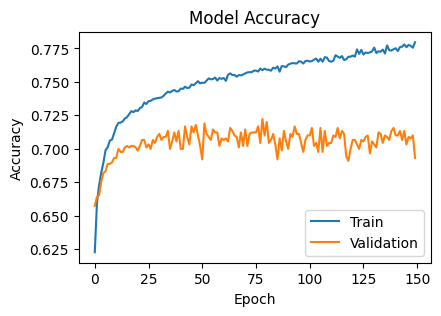

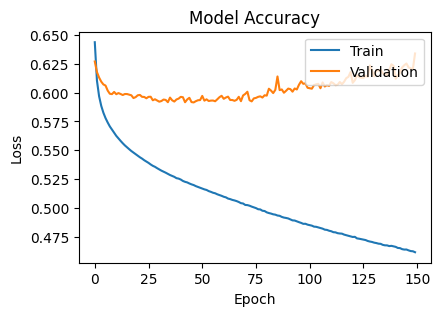

In [23]:
# Create a figure for the plots with a specified size
plt.figure(figsize=(10,3))
# Create the first subplot (1 row, 2 columns, 1st plot)
plt.subplot(1,2,1)
# Plot the training accuracy over epochs
plt.plot(history.history['accuracy'])
# Plot the validation accuracy over epochs
plt.plot(history.history['val_accuracy'])
# Set the title of the first plot
plt.title('Model Accuracy')
# Set the label for the x-axis
plt.xlabel('Epoch')
# Set the label for the y-axis
plt.ylabel('Accuracy')
# Add a legend to distinguish between training and validation accuracy
plt.legend(['Train','Validation'])

# Create a new figure for the second plot (or use the same figure if preferred, but new figure is good for separate plots)
plt.figure(figsize=(10,3))
# Create the second subplot (1 row, 2 columns, 2nd plot)
plt.subplot(1,2,2)
# Plot the training loss over epochs
plt.plot(history.history['loss'])
# Plot the validation loss over epochs
plt.plot(history.history['val_loss'])
# Set the title of the second plot
plt.title('Model Loss') # Corrected title to 'Model Loss'
# Set the label for the x-axis
plt.xlabel('Epoch')
# Set the label for the y-axis
plt.ylabel('Loss')
# Add a legend to distinguish between training and validation loss
plt.legend(['Train','Validation'],loc = 'upper right')
# Display the plots
plt.show()

In [24]:
import pickle

# Save the trained model
with open("Basic_ANN_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!
